# Description
The aim of this notebook is to show the distribution of the issues text in the vector space

In [1]:
import sys
import os
import import_ipynb

# Add the folder containing "files.ipynb" to the Python path
sys.path.append(os.path.abspath("Utils"))
# Import the files notebook
import Utils.file_manager as fm

import numpy as np 
import pandas as pd

ARRAY_DIRECTORY_PATH = "./Array_After_Preprocessing"

In [2]:
X_embedded = fm.import_array("X_embedded", ARRAY_DIRECTORY_PATH)[:, :200]
X_embedded.shape

(8082, 200)

In [3]:
X_new_features = fm.import_array("X_new_features", ARRAY_DIRECTORY_PATH)
X_new_features.shape

(8082, 15)

In [4]:
X_bigram = fm.import_array("X_bigram", ARRAY_DIRECTORY_PATH)
X_bigram.shape

(8082, 107)

In [5]:
X = np.concatenate((X_embedded, X_new_features, X_bigram), axis=1)

### Retrive the labels

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
y = pd.read_csv("./Datasets/train.csv").polarity

In [8]:
y = LabelEncoder().fit_transform(y)

In [9]:
# Create a mapp between polarity and color
color_map = []

for p in y:
    if p == 1:
        color_map.append("yellow")
    elif p == 0:
        color_map.append("purple")
    elif p == 2:
        color_map.append("green")
    else:
        print("Houston, we have a problem...")

### Distribution of issues with PCA

In [10]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [11]:
X_emb_pca = PCA(n_components=2).fit_transform(X_embedded)
X_nf_pca = PCA(n_components=2).fit_transform(X_new_features)
X_bigram_pca = PCA(n_components=2).fit_transform(X_bigram)
X_pca = PCA(n_components=2).fit_transform(X)


      LEGEND:
      Yellow -> Negative
      Purple -> Neutral
      green -> Positive
      


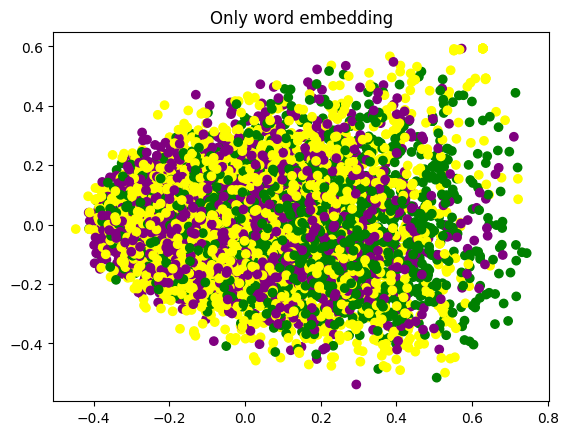

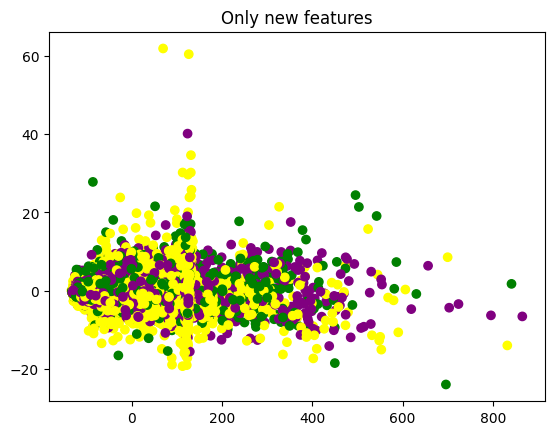

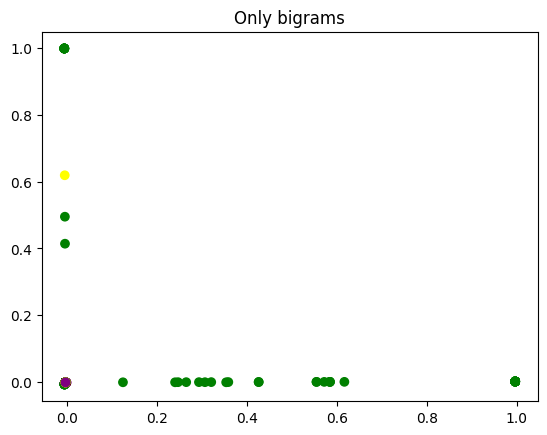

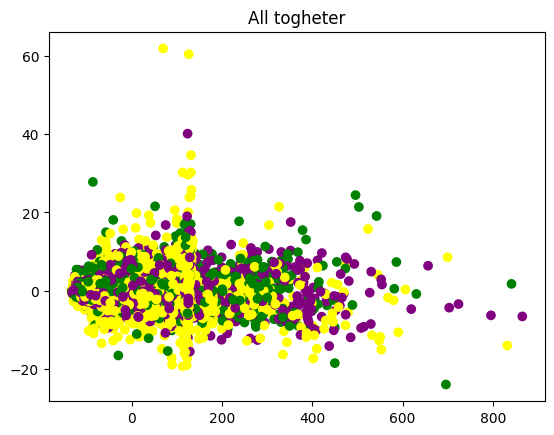

In [12]:
print('''
      LEGEND:
      Yellow -> Negative
      Purple -> Neutral
      green -> Positive
      ''')

plt.figure(1)  # Create the first figure
plt.scatter(X_emb_pca[:, 0], X_emb_pca[:, 1], c=color_map)
plt.title("Only word embedding")

plt.figure(2)  # Create the second figure
plt.scatter(X_nf_pca[:, 0], X_nf_pca[:, 1], c=color_map)
plt.title("Only new features")

plt.figure(3)  # Create the therd figure
plt.scatter(X_bigram_pca[:, 0], X_bigram_pca[:, 1], c=color_map)
plt.title("Only bigrams")

plt.figure(4)  # Create the fourth figure
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_map)
plt.title("All togheter")


plt.show()

### Distribution of issues with T-SNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
X_emb_tsne = TSNE(2).fit_transform(X_embedded)
print("First done.")
X_nf_tsne = TSNE(2).fit_transform(X_new_features)
print("Second done.")
X_bi_tsne = TSNE(2).fit_transform(X_bigram)
print("Third done.")
X_tsne = TSNE(2).fit_transform(X)
print("fourth done.")

First done.
Second done.
Third done.
fourth done.



      LEGEND:
      Yellow -> Negative
      Purple -> Neutral
      green -> Positive
      


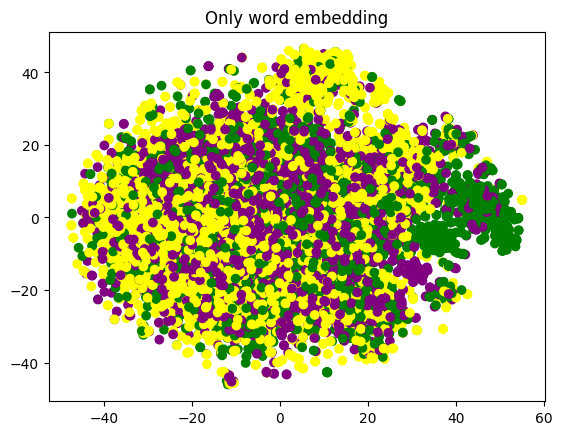

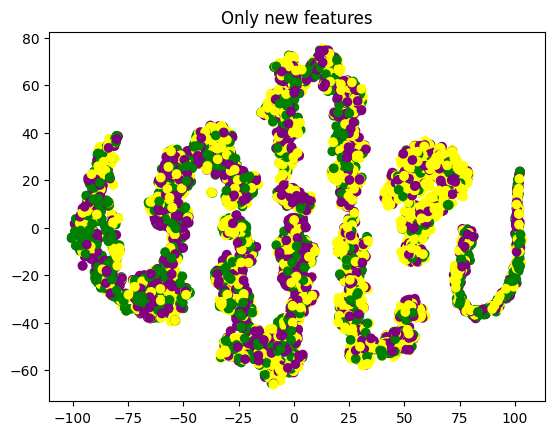

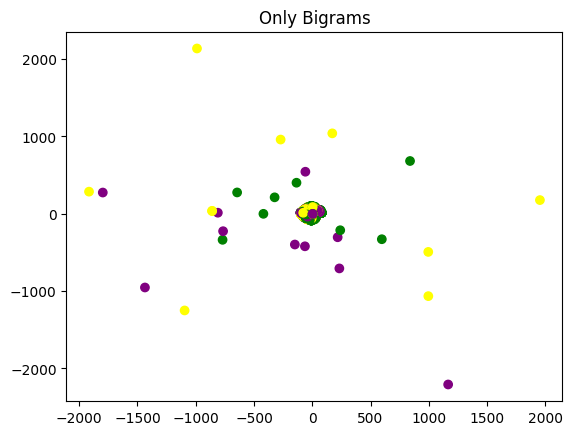

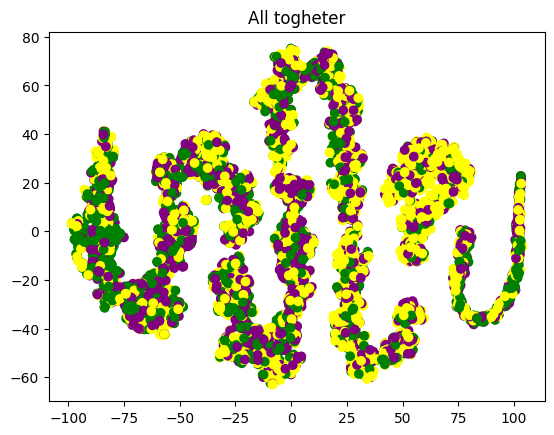

In [15]:
print('''
      LEGEND:
      Yellow -> Negative
      Purple -> Neutral
      green -> Positive
      ''')

plt.figure(1)  # Create the first figure
plt.scatter(X_emb_tsne[:, 0], X_emb_tsne[:, 1], c=color_map)
plt.title("Only word embedding")

plt.figure(2)  # Create the second figure
plt.scatter(X_nf_tsne[:, 0], X_nf_tsne[:, 1], c=color_map)
plt.title("Only new features")

plt.figure(3)  # Create the third figure
plt.scatter(X_bi_tsne[:, 0], X_bi_tsne[:, 1], c=color_map)
plt.title("Only Bigrams")

plt.figure(4)  # Create the fourth figure
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_map)
plt.title("All togheter")


plt.show()